In [ ]:
!mkdir ./data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp ./drive/MyDrive/data.zip ./data/
!cd ./data && unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/550.jpg            
  inflating: data/5500.jpg           
  inflating: data/5501.jpg           
  inflating: data/5502.jpg           
  inflating: data/5503.jpg           
  inflating: data/5504.jpg           
  inflating: data/5505.jpg           
  inflating: data/5506.jpg           
  inflating: data/5507.jpg           
  inflating: data/5508.jpg           
  inflating: data/5509.jpg           
  inflating: data/551.jpg            
  inflating: data/5510.jpg           
  inflating: data/5511.jpg           
  inflating: data/5512.jpg           
  inflating: data/5513.jpg           
  inflating: data/5514.jpg           
  inflating: data/5515.jpg           
  inflating: data/5516.jpg           
  inflating: data/5517.jpg           
  inflating: data/5518.jpg           
  inflating: data/5519.jpg           
  inflating: data/552.jpg            
  inflating: data/5520.jpg           
  inflating: data/5521.jpg           

2**. text Process**

In [ ]:
import re
import pandas as pd
from io import StringIO
FILENAME = '/content/data/train.csv'
with open(FILENAME) as file:
  lines = [re.sub(r'([^,])"(\s*[^\n])', r'\1/"\2', line) for line in file]
  df_train = pd.read_csv(StringIO(''.join(lines)), escapechar="/")

FILENAME = '/content/data/test.csv'
with open(FILENAME) as file:
  lines = [re.sub(r'([^,])"(\s*[^\n])', r'\1/"\2', line) for line in file]
  df_test = pd.read_csv(StringIO(''.join(lines)), escapechar="/")

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as sw
stop_words = sw.words()

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df_train.head()

,ImageID,Labels,Caption
0,0.jpg,1,Woman in swim suit holding parasol on sunny day.
1,1.jpg,1 19,A couple of men riding horses on top of a gree...
2,2.jpg,1,They are brave for riding in the jungle on tho...
3,3.jpg,8 3 13,a black and silver clock tower at an intersect...
4,4.jpg,8 3 7,A train coming to a stop on the tracks out side.


In [ ]:
df_train['WORD_COUNT'] =  df_train['Caption'].apply(lambda x: len(x.split()))
df_train['WORD_COUNT']

0         9
1        12
2        11
3        12
4        11
         ..
29991    13
29992    11
29993     9
29994     8
29995    11
Name: WORD_COUNT, Length: 29996, dtype: int64

In [ ]:
data = df_train

**one_hot 标签**

In [ ]:
import numpy as np
labels = np.zeros([len(data), 20])
len(labels)
for row in range(len(data)):
  label_list = str(data.iloc[row,1]).split(' ')
  for label_index in range(len(label_list)):
    labels[row][int(label_list[label_index])] = 1;

labels.shape

(29996, 20)

In [ ]:
labels

In [ ]:
# 文本匹配的正则表达式
train_caption = df_train['Caption'].tolist()
test_caprion = df_test['Caption'].tolist()

In [ ]:
# 改小写
text_train = [s.lower() for s in train_caption]
text_test = [s.lower() for s in test_caprion]

In [ ]:
# 去除标点
import re
def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    
    return x
text_train = [remove_punctuation_re(s) for s in text_train]
text_test = [remove_punctuation_re(s) for s in text_test]

In [ ]:
# 分词
text_train = [word_tokenize(s) for s in text_train]
text_test = [word_tokenize(s) for s in text_test]

In [ ]:
# Remove stopwords
text_train_rs=[]
for tokens in text_train:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_train_rs.append(filtered_sentence)

text_test_rs=[]
for tokens in text_test:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_test_rs.append(filtered_sentence)


In [ ]:
# Lemmatisation
text_train_le = []
for tokens in text_train_rs:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_train_le.append(lemma_sentence)

text_test_le = []
for tokens in text_test_rs:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_test_le.append(lemma_sentence)

In [ ]:
text_test_le[:5]
text_train_le[:5]

[['woman', 'swim', 'suit', 'holding', 'parasol', 'sunny', 'day'],
 ['couple', 'riding', 'horse', 'top', 'green', 'field'],
 ['brave', 'riding', 'jungle', 'elephant'],
 ['black', 'silver', 'clock', 'tower', 'intersection', 'near', 'tree'],
 ['train', 'coming', 'stop', 'track', 'side']]

**Label Encoding**

In [ ]:
# train_labels = df_train['Labels'].tolist()
# train_labels[:10]

In [ ]:
# 获取unique labels

# list_labels = []
# for labels in train_labels:
#   list_labels.extend(list(map(int, labels.split(' '))))

# # unique_labels = list(set(unique_labels))
# list_labels[:5]

In [ ]:
# import numpy as np
# from sklearn.preprocessing import LabelEncoder
# unique_labels = np.unique(list_labels)
# lEnc = LabelEncoder()

# label_train_encoded = lEnc.fit_transform(unique_labels)

# n_class = len(unique_labels)

In [ ]:
# print(unique_labels)
# print(lEnc.transform(unique_labels))

In [ ]:
# list_labels[:5]

In [ ]:
# label_index = {}
# idx = 0
# for word in unique_labels:
#     label_index[word] = idx
#     idx += 1
# print(label_index)

In [ ]:
# def label_encoded(sentences, label_index):
#   label_encoded = []
#   for word in list_labels:
#     temp_encoded = label_index[word]
#     label_encoded.append(temp_encoded)
#   return label_encoded

In [ ]:
# label_encoded = label_encoded(list_labels, label_index)

In [ ]:
# label_encoded[:5]

**Get Word list**

In [ ]:
word_set = set() 
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

for sent in text_train_le + text_test_le:
    for word in sent:
        word_set.add(word)

In [ ]:
word_list = list(word_set) 
word_list.sort()

word_index = {}
idx = 0
for word in word_list:
    word_index[word] = idx
    idx += 1
print(word_index)

{'030': 0, '1': 1, '10': 2, '101': 3, '12': 4, '14713jpg1': 5, '14958jpg1': 6, '14a': 7, '164': 8, '18': 9, '19': 10, '1940s': 11, '1950': 12, '1950s': 13, '1970s': 14, '19th': 15, '2': 16, '20': 17, '2010': 18, '21st': 19, '24': 20, '25': 21, '29878jpg2': 22, '2nd': 23, '3': 24, '30': 25, '34th': 26, '350': 27, '377': 28, '3d': 29, '3rd': 30, '4': 31, '407': 32, '42': 33, '46': 34, '463': 35, '4788jpg1the': 36, '4way': 37, '5': 38, '50': 39, '50th': 40, '54': 41, '55': 42, '5a': 43, '6': 44, '66': 45, '6small': 46, '7': 47, '747': 48, '749': 49, '787': 50, '8': 51, '851': 52, '9': 53, '90th': 54, '9one': 55, '[PAD]': 56, '[UNKNOWN]': 57, 'aaron': 58, 'abandon': 59, 'abandoned': 60, 'abat': 61, 'abed': 62, 'ability': 63, 'able': 64, 'aboard': 65, 'abraham': 66, 'absolutley': 67, 'abstract': 68, 'abundance': 69, 'accent': 70, 'accept': 71, 'accepting': 72, 'accessory': 73, 'accolade': 74, 'accompanied': 75, 'ace': 76, 'acknowledging': 77, 'acrobatic': 78, 'across': 79, 'acrossed': 80, '

In [ ]:
word_list[:5]

['030', '1', '10', '101', '12']

In [ ]:
len(word_index)

6862

**Padding**

In [ ]:
seq_length = max([len(s) for s in text_train_le + text_test_le])
seq_length

28

In [ ]:
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded = encode_and_add_padding(text_train_le, seq_length, word_index)
test_pad_encoded = encode_and_add_padding(text_test_le, seq_length, word_index )

In [ ]:
print(sent_encoded[:5])

[[6768, 5951, 5884, 2915, 4205, 5898, 1626, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56], [1452, 4942, 2948, 6194, 2678, 2234, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56], [761, 4942, 3205, 1995, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56], [634, 5373, 1214, 6229, 3108, 3904, 6279, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56], [6245, 1313, 5779, 6235, 5342, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56]]


**Embedding lookup table**

In [ ]:
import gensim.downloader as api

word_emb_model = api.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
import numpy as np
emb_dim = word_emb_model.vector_size

emb_table = []

for idx, word in enumerate(word_list):
  if word in word_emb_model:
    emb_table.append(word_emb_model[word])
  else:
    emb_table.append([0] * emb_dim)  # 使用 0 的原因是因为该单词出现的次数不多，所以不重要，用0刚刚好表示其不重要程度。

emb_table = np.array(emb_table)

In [ ]:
print(emb_table.shape) # 这一步操作就回返回对应的向量。

(6862, 25)


In [ ]:
# train_input = []
# #train_label = []

# for index in range(len(train_labels)):
#   label_list = list(map(int, train_labels[index].split(' ')))
#   for j in range(len(label_list)):
#     train_input.append(text_train_le[index])
#     #train_label.append(label_list[j])

In [ ]:
# train_input[:5]

In [ ]:
# label_encoded[:5]

In [ ]:
len(text_train_le)

29996

In [ ]:
sent_encoded_new = encode_and_add_padding(text_train_le, seq_length, word_index)

In [ ]:
print(sent_encoded_new[:5])

[[6768, 5951, 5884, 2915, 4205, 5898, 1626, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56], [1452, 4942, 2948, 6194, 2678, 2234, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56], [761, 4942, 3205, 1995, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56], [634, 5373, 1214, 6229, 3108, 3904, 6279, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56], [6245, 1313, 5779, 6235, 5342, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56]]


In [ ]:
# sent_encoded_new  这个是训练集  
# label_encoded    这个是labels（标签）

In [ ]:
# bi_LSTM模型
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
vocab_size = len(word_list)
n_class = 20
n_hidden = 64
learning_rate = 0.001
total_epoch = 1

In [ ]:
# bi-LSTM

class BI_LSTM(nn.Module):
  def __init__(self):
    super(BI_LSTM, self).__init__()
    self.emb = nn.Embedding(vocab_size, emb_dim)
    self.emb.weight.data.copy_(torch.from_numpy(emb_table))
    self.emb.weight.requires_grad = False
    self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
    self.linear = nn.Linear(n_hidden*2, n_class)

  def forward(self, x):
    x = self.emb(x) 
    lstm_out, (h_n,c_n) = self.lstm(x)
    hidden_out =torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
    z = self.linear(hidden_out)
    return z

In [ ]:
model = BI_LSTM().to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
from torch.utils.data import DataLoader, Dataset

class caption_data(Dataset):
  def __init__(self, data, label = None):
    self.data = data
    self.label = label

  def __getitem__(self, index):
    #if self.label != None:
    data = np.array(self.data[index])
    labels = np.array(self.label[index])
    return data, labels
    # else:
    #   return np.array(self.data[index]), np.array(1)
  def __len__(self):
    return len(self.data)

train_dataset = caption_data(sent_encoded_new, labels)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True) # 在 batch_size时候有用，每次取32个数，然后打乱。

In [ ]:
for epoch in range(total_epoch): 
  for idx, (data, label) in enumerate(train_loader):
    input_torch = data.to(device)
    target_torch = label.to(device)  
    
    
    model.train()
    
    
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    # acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())

    # print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
    print('Epoch: %d, loss: %.5f' %(epoch + 1, loss.item()))
print('Finished Training')

Epoch: 1, loss: 0.07850
Epoch: 1, loss: 0.07037
Epoch: 1, loss: 0.08968
Epoch: 1, loss: 0.10397
Epoch: 1, loss: 0.10936
Epoch: 1, loss: 0.09353
Epoch: 1, loss: 0.11945
Epoch: 1, loss: 0.09635
Epoch: 1, loss: 0.06873
Epoch: 1, loss: 0.10703
Epoch: 1, loss: 0.08031
Epoch: 1, loss: 0.10770
Epoch: 1, loss: 0.08719
Epoch: 1, loss: 0.11448
Epoch: 1, loss: 0.09950
Epoch: 1, loss: 0.12037
Epoch: 1, loss: 0.06895
Epoch: 1, loss: 0.11517
Epoch: 1, loss: 0.09337
Epoch: 1, loss: 0.11881
Epoch: 1, loss: 0.11834
Epoch: 1, loss: 0.10690
Epoch: 1, loss: 0.11901
Epoch: 1, loss: 0.11047
Epoch: 1, loss: 0.10260
Epoch: 1, loss: 0.08156
Epoch: 1, loss: 0.09250
Epoch: 1, loss: 0.12700
Epoch: 1, loss: 0.08757
Epoch: 1, loss: 0.10159
Epoch: 1, loss: 0.09278
Epoch: 1, loss: 0.09956
Epoch: 1, loss: 0.10459
Epoch: 1, loss: 0.11625
Epoch: 1, loss: 0.10694
Epoch: 1, loss: 0.11358
Epoch: 1, loss: 0.07345
Epoch: 1, loss: 0.10723
Epoch: 1, loss: 0.12044
Epoch: 1, loss: 0.07820
Epoch: 1, loss: 0.09029
Epoch: 1, loss: 

**test part**

In [ ]:
text_test_le

In [ ]:
sent_encoded_new_test = encode_and_add_padding(text_test_le, seq_length, word_index)

In [ ]:
# len(sent_encoded_new_test)

10000

In [ ]:
#test_sample = sent_encoded_new_test[1]

In [ ]:
#test_sample = torch.from_numpy(np.array(test_sample)[None])

In [ ]:
#ljy = model(test_sample)

In [ ]:
#ljy

tensor([[-11.9104,   5.4063,  -5.3024,  -3.4014,  -7.2966,  -7.9180,  -6.1912,
          -6.6231,  -4.6510,  -5.7692,  -5.1699,  -7.1337, -12.1201,  -6.6942,
          -9.4375,  -3.6854,  -5.7146,  -4.9502,  -3.5669,  -7.7140]],
       grad_fn=<AddmmBackward>)

In [ ]:
test_sample7 = sent_encoded_new_test[7]
test_sample7 = torch.from_numpy(np.array(test_sample7)[None])
ljy7 = model(test_sample7)
ljy7

tensor([[-11.0892,   0.4883,  -4.6126,  -3.5841,  -5.2767,  -2.0458,  -5.6351,
          -5.5387,  -3.2657,   2.1464,  -5.1036,  -5.0980, -11.3289,  -7.2145,
          -7.7952,  -3.9957,  -1.9500,  -5.8146,  -4.4996,  -6.1614]],
       grad_fn=<AddmmBackward>)

In [ ]:
#y_pre=(ljy7 > 0)
#y_pre

tensor([[False,  True, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False, False]])

In [ ]:
test_images = df_test['ImageID'].tolist()
test_images

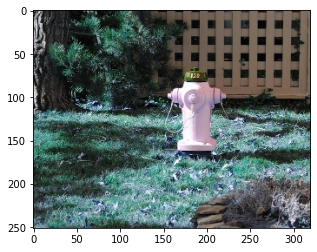

In [ ]:
import cv2
import matplotlib.pyplot as plt
plt.imshow(cv2.imread('data/data/' + (test_images[6])))

In [ ]:
#test_output[:10]

In [ ]:
 #y_pre=(output > 0)
 #y_pre[:10]

In [ ]:
y_pre[0]

In [ ]:
labelsList = []
for x in sent_encoded_new_test:
  test_sample = x
  test_sample_2 = torch.from_numpy(np.array(test_sample))
  test_output = model(test_sample_2[None])
  y_pre=(test_output > 0)
  labels=""
  for i in range(20):
    if y_pre[0][i]:
      labels=labels+str(i)+" "
  labelsList.append(labels)

In [ ]:
labelsList

['1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '11 ',
 '1 9 ',
 '1 9 ',
 '1 ',
 '1 5 ',
 '1 19 ',
 '7 ',
 '1 ',
 '1 ',
 '1 ',
 '1 3 6 ',
 '1 ',
 '3 8 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '5 ',
 '1 ',
 '1 ',
 '1 7 ',
 '1 8 19 ',
 '7 ',
 '1 ',
 '1 5 8 ',
 '1 ',
 '1 4 ',
 '1 ',
 '1 ',
 '3 8 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '',
 '1 7 ',
 '1 ',
 '',
 '1 ',
 '11 ',
 '1 ',
 '1 ',
 '1 ',
 '7 ',
 '1 ',
 '16 ',
 '1 ',
 '1 19 ',
 '1 ',
 '1 ',
 '1 ',
 '1 3 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 3 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 19 ',
 '1 ',
 '1 ',
 '1 7 ',
 '1 ',
 '1 ',
 '15 ',
 '1 ',
 '1 13 ',
 '7 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 3 8 ',
 '5 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '3 10 ',
 '',
 '11 ',
 '1 ',
 '5 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '17 18 ',
 '1 ',
 '17 ',
 '1 ',
 '1 ',
 '17 18 ',
 '1 ',
 '1 ',
 '1 ',
 '17 ',
 '1 4 ',
 '',
 '1 ',
 '1 3 10 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 ',
 '1 9 ',
 '1 ',
 '1 7 ',
 '15

In [ ]:
print(df_test.iloc[:,0])

0       30000.jpg
1       30001.jpg
2       30002.jpg
3       30003.jpg
4       30004.jpg
          ...    
9995    39995.jpg
9996    39996.jpg
9997    39997.jpg
9998    39998.jpg
9999    39999.jpg
Name: ImageID, Length: 10000, dtype: object


In [ ]:
data_re=pd.core.frame.DataFrame({"ImageID":df_test.iloc[:,0],"Labels":labelsList})

In [ ]:
data_re.to_csv("test2.csv",index=False,sep=',')